In [2]:
import nltk
import re
from collections import Counter
from itertools import islice
import sys
sys.path.append('..')
from utils.another import get_ngrams

## test corpus

In [57]:
test_corpus = []
with open('../data/test_v2.txt','rt') as infile, \
        open('../data/test_v2-preprocessed.txt','wt') as outfile:
        infile.readline()
        for line in infile:
            comma_pos = line.find(',')
            words = line.rstrip()[comma_pos+1:].strip('"').lower()
            if words == '':
                continue
    #         words = re.sub('[0-9]',"#",words)
            tokenized_sentence = nltk.word_tokenize(words)
            outfile.write(' '.join(tokenized_sentence)+'\n')
            test_corpus.append(tokenized_sentence)

## sentence's length

In [61]:
import matplotlib.pyplot as plt

In [4]:
sent_len_counter = Counter()
for step, sentence in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    sent_len_counter[len(sentence)] += 1
    
min_len = min(sent_len_counter.keys())
max_len = max(sent_len_counter.keys())
print(f'min sentence length: {min_len}')
print(f'max sentence length: {max_len}')

min sentence length: 0
max sentence length: 996


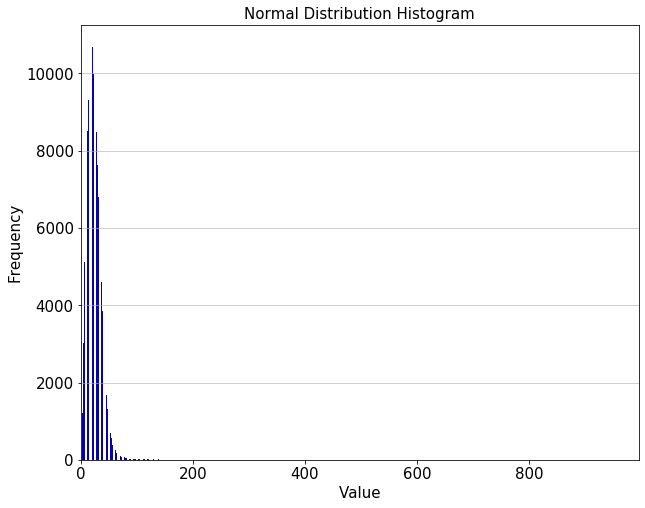

In [5]:
plt.figure(figsize=[10,8])

plt.bar(sent_len_counter.keys(), sent_len_counter.values(), width = 0.5, color='#0504aa')#, alpha=0.7)
plt.xlim(min_len, max_len)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

## ngrams frequency

In [5]:
unigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for token in line:
        unigram_counter[token] += 1

In [7]:
print(f'number of all unigram in test corpus: {len(unigram_counter)}')
unigram_counter.most_common(30)

number of all unigram in test corpus: 159752


[('the', 402020),
 (',', 342277),
 ('.', 310619),
 ('to', 178207),
 ('of', 168734),
 ('a', 160164),
 ('and', 158065),
 ('in', 144187),
 ('that', 67490),
 ("'s", 66412),
 ('for', 65828),
 ('``', 62479),
 ("''", 62409),
 ('on', 57408),
 ('is', 54571),
 ('with', 45371),
 ('was', 45145),
 ('it', 44682),
 ('said', 42003),
 ('as', 39376),
 ('he', 38611),
 ('at', 37377),
 ('by', 33483),
 ('from', 32106),
 ('be', 30163),
 ('his', 29807),
 ('have', 29134),
 ('has', 28797),
 ('but', 27430),
 ('are', 27330)]

In [8]:
def get_ngrams(sentence, n):
    for i in range(len(sentence) - n + 1):
        yield ' '.join(sentence[i:i+n])

In [9]:
bigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    bigram_counter.update(get_ngrams(line, 2))

In [10]:
print(f'number of all bigram in test corpus: {len(bigram_counter)}')
bigram_counter.most_common(30)

number of all bigram in test corpus: 1881410


[("`` ''", 62409),
 ('of the', 38752),
 ('in the', 35278),
 (', the', 22920),
 (', ``', 20749),
 (', and', 18468),
 ('to the', 16549),
 ('on the', 13078),
 ('for the', 13058),
 (', a', 10947),
 ('said .', 10755),
 ('at the', 10723),
 ('and the', 10273),
 (', but', 9957),
 ('in a', 9825),
 (', which', 9122),
 ('to be', 8907),
 ('with the', 7844),
 (', who', 7650),
 ('from the', 7571),
 ('that the', 7463),
 ('of a', 7309),
 ('by the', 7041),
 ('as a', 5619),
 ('with a', 5278),
 ('more than', 5256),
 ('to a', 5249),
 ('has been', 5171),
 ('for a', 5163),
 (', said', 5160)]

In [11]:
trigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for trigram in list(get_ngrams(line, 3)):
        trigram_counter[trigram] += 1

In [12]:
print(f'number of all trigram in test corpus: {len(trigram_counter)}')
trigram_counter.most_common(30)

number of all trigram in test corpus: 4594232


[(", `` ''", 20749),
 ("`` '' said", 3694),
 ("`` '' he", 3644),
 ("`` '' the", 3055),
 ('one of the', 2580),
 ('he said .', 2531),
 ("'' he said", 2336),
 (": `` ''", 2290),
 ('( ap )', 2275),
 (', according to', 2227),
 ('the united states', 2223),
 ("a `` ''", 1858),
 (', and the', 1856),
 ("the `` ''", 1817),
 ('ap ) -', 1788),
 ("`` '' and", 1697),
 ('as well as', 1436),
 ('the end of', 1295),
 ('upi ) --', 1289),
 ('( upi )', 1275),
 ('said : ``', 1242),
 ("`` '' a", 1179),
 (', which is', 1138),
 ("the world 's", 1109),
 (', but the', 1083),
 ('( reuters )', 1069),
 ("`` '' she", 1056),
 ('reuters ) -', 1047),
 ("`` '' in", 1018),
 ('according to the', 1012)]

In [13]:
import pickle
with open('../data/unigram_counter_test_str.pickle', 'wb') as unigram_file, \
        open('../data/bigram_counter_test_str.pickle', 'wb') as bigram_file, \
        open('../data/trigram_counter_test_str.pickle', 'wb') as trigram_file:
    pickle.dump(unigram_counter, unigram_file)
    pickle.dump(bigram_counter, bigram_file)
    pickle.dump(trigram_counter, trigram_file)    

## distribution

In [14]:
from collections import defaultdict

In [15]:
unigram_dist = defaultdict(lambda: 0)
bigram_dist = defaultdict(lambda: 0)
trigram_dist = defaultdict(lambda: 0)

# unigram distrubution counting
n_unigram = len(unigram_counter)
for word in unigram_counter:
    unigram_dist[word] /= n_unigram
    
# bigram distrubution counting
for bigram in bigram_counter:
    bigram_dist[bigram] = bigram_counter[bigram] / unigram_counter[bigram.split()[0]]
    
# trigram distrubution counting
for trigram in trigram_counter:
    trigram.rfind(' ')
    trigram_dist[trigram] = trigram_counter[bigram] / bigram_counter[trigram[:trigram.rfind(' ')]]